# Porftolio Optimization of a cryptocurrency-portfolio

## About this notebook

In general, portfolio optimization is the process of selecting the best portfolio (asset allocation), out of an asset portfolio, according to some objectives [1]. In the following notebook, we will explain two methods for Asset Allocation on a portfolio based on 20 cryptocurrencies: Monte Carlo Simulation and Mathematical Optimization. Furthermore, we will compare the result of the crypto-portfolio optimization with optimizations performed on a mixed-portfolio (cryptocurrencies and stocks) and a portfolio based on selected stocks of the S&P 500.  

## 1. Assumptions of MPT

- Asset returns are normally distributed random variables
- Investors are regarded as rational and risk-averse
- Investors all have access to the same sources of information for investment decisions, i.e no information-asymmetry
- Investors share similar views on expected returns
- No consideration of taxes or fees of any kind
- The user of the model is a price taker, not a price maker (i.e. the investor is unable to influence the exercise price of his/her investment by any invested amount of money)
- Investors have unlimited access to borrow (and lend) money at the risk free rate
- Assumption that an investor is not allowed to set up short positions in
  a security. Only long positions are allowed. 
- By market risk, we consider both positive and negative deviations of the actual return from the expected one


For further information, see [2] and [3] 

## 2. Modern portfolio theory 

Modern portfolio theory (MPT) or mean-variance analysis is a mathematical framework on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk [4]. Moreover, one of the core statements of the theory is, that owning different type of assets is less risky than owing just one type. 

Harry Markowitz introduced MPT in 1952, and such work led him to be awarded a with Nobel price in economics [5]. 


### 2.1. Risk and expected return:

* **Portfolio Return: ** Is the proportion-weighted combination of the constitutent asset's return.

* **Portfolio volatility: ** Is a function of the correlation $\rho_ij$ of the component assets, for all asset pairs *(i,j)*.

###  2.2. Mathematical model: 

**Expected return**

$$E(R_p)=\sum_{i}w_iE(R_i)$$

Where $R_p$ is the return of the portfolio, $R_i$ is the return on asset $i$ ans $w_i$ is the weighting of component asset (or the proportion of asset $i$ in the portfolio)

    
**Portfolio return variance**

$$\sigma_p^2 = \sum_{i}w_i^2\sigma_i^2 + \sum_{i}\sum_{j}w_iw_j\sigma_i\sigma_j\rho_{ij}$$


Where $\sigma$ is the standard deviation (sample) of the periodic returns on an asset, and $\rho_{ij}$ is the correlation coefficient between the returns on assets i and j. Alternatively the expression can be written as:

$$\sigma_p^2 = \sum_{i}\sum_{j}w_iw_j\sigma_i\sigma_j\rho_{ij}$$

Where $\rho_{ij} = 1$ for $i=j$, or

$$\sigma_p^2 = \sum_{i}\sum_{j}w_iw_j\sigma_{ij}$$


where $\sigma_{ij} = \sigma_i\sigma_j\rho_{ij}$ is the (sample) covariance of the periodic returns on the two assets, or alternatively denoted as $\sigma(i,j), cov_{ij}$ or $cov(i,j)$.

**Portfolio return volatility (standard deviation)**

$$\sigma_p = \sqrt{\sigma_p^2}$$


The mathematical model definition of the portfolio volatility relies on an algebraic representation, expensive to calculate when the number of assets within the portfolio is big. In perspective, the expression tends to increment its size at a $2x + 1$ rate per asset:

* 2 assets:

$$\sigma_p^2 = w_A^2\sigma_A^2 + w_B^2\sigma_B^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{AB}$$

* 3 assets:

$$\sigma_p^2 = w_A^2\sigma_A^2 + w_B^2\sigma_B^2 + w_C^2\sigma_C^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{AB} + 2w_Aw_C\sigma_A\sigma_C\rho_{AC} + 2w_Bw_C\sigma_B\sigma_C\rho_{BC}$$


Then one of the main contributions delivered by Markowitz with his work, is the representation of the overall standard deviation or risk  in a matricial form which are computationally much cheaper to calculate.

$$
E(R_p) = \left(\begin{array}{cc} 
w_1 &  w_2 & ... & w_n
\end{array}\right).
\left(\begin{array}{cc} 
E(R_1)\\ 
E(R_2)\\
...\\
E(R_n)
\end{array}\right)
$$

$$
\sigma_p^2 = \left(\begin{array}{cc} 
w_1 &  w_2 & ... & w_n
\end{array}\right).
\left(\begin{array}{cc} 
\sigma^2(A_{11}) & \sigma^2(A_{12})  & ... & \sigma^2(A_{1n}) \\
\sigma^2(A_{21}) & \sigma^2(A_{22})  & ... & \sigma^2(A_{2n}) \\
... & ...  & ... & ... \\
\sigma^2(A_{m1}) & \sigma^2(A_{m2})  & ... & \sigma^2(A_{mn}) \\
\end{array}\right).
\left(\begin{array}{cc} 
w_1\\ 
w_2\\
...\\
w_n
\end{array}\right)
$$

## Import Libraries

In [277]:
#!pip install seaborn
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt

%matplotlib inline

In [278]:
df_crypto = pd.read_csv('crypto_20_test.csv')

In [279]:
df_crypto['time'] =  pd.to_datetime(df_crypto['time'], format='%Y-%m-%d')

In [280]:
df_crypto.set_index('time', inplace=True)

In [281]:
#df_new = df_crypto[(df_crypto.index >= '2016-01-01')]
df_new = df_crypto[(df_crypto.index >= '2016-01-01') & (df_crypto.index <= '2018-12-07')]

In [282]:
df_new.isnull().values.sum()

0

In [283]:
df_new.tail()

BTC     XRP     ETH      DOGE    LTC   BTB  BITCNY    XMR  \
time                                                                        
2018-12-03  3871.41  0.3468  108.23  0.002149  30.70  4.63  0.1312  54.77   
2018-12-04  3948.44  0.3519  109.82  0.002180  30.95  4.94  0.1339  56.94   
2018-12-05  3737.53  0.3370  101.57  0.002224  28.92  3.57  0.1495  51.59   
2018-12-06  3485.18  0.3074   90.43  0.002107  26.53  3.21  0.1742  46.40   
2018-12-07  3420.57  0.3023   93.61  0.002138  25.00  3.43  0.1487  46.94   

            BLOCK      XWC    DCR      NXT    FCT   DASH    MAID       BCN  \
time                                                                         
2018-12-03   1.77  0.04286  19.26  0.03248  11.80  84.87  0.1362  0.000774   
2018-12-04   1.88  0.04355  19.73  0.03364  13.41  85.72  0.1431  0.000750   
2018-12-05   1.90  0.04063  18.77  0.03143  16.15  78.20  0.1387  0.000710   
2018-12-06   1.67  0.03813  18.04  0.02799  13.07  64.79  0.1367  0.000593   
2018-12-07   1.60  0.04139  17.22  0.02685  11.88  68.47  0.1369  0.000616   

                BTS        SC       DGB    MONA  
time                                             
2018-12-03  0.04630  0.002787  0.011890  0.6229  
2018-12-04  0.04703  0.002882  0.012080  0.6246  
2018-12-05  0.04265  0.002654  0.010610  0.5640  
2018-12-06  0.03489  0.002405  0.009968  0.5263  
2018-12-07  0.03602  0.002429  0.009646  0.5504

#### The Data


The price data for all individual cryptocurrencies contained in the csv-file above were obtained from crypto-exchanges, and then merged into a master file. The price-data timeframe ranges from 2016-01-01 till 2018-12-07. The final data contains the following coins:

- Top 5 crypto-coins (based on highest market cap):
    - Bitcoin (BTC)
    - Ripple (XRP)
    - Ethereum (ETH)    
    - Litecoin (LTC)
    - Monero (XMR)


- Randomly Selection of coins:
    - BitBar (BTB)
    - Decred (DCR)
    - Nxt (NXT)
    - Factom (FCT)
    - Dash (DASH)
    - MaidSafeCoin (MAID)
    - Bytecoin (BCN)
    - BitShares (BTS)
    - Siacoin (SC)
    - DigiByte (DGB)
    - MonaCoin (MONA)
    - Dogecoin (DOGE)
    - bitCNY (BITCNY)
    - Blocknet (BLOCK)
    - WhiteCoin (XWC)
    

### Simple Returns vs. Log Returns

Why log-returns? The main benefit of using log-returns versus prices is normalization: measuring all variables in a comparable metric enables to evaluate relationships amongst two or more assets of originally unequal values.


>>>$$r_{i} = \frac{p_i - p_j}{p_j},$$
<break>
where $r_i$ is return at time $i$, $p_i$ is the price at time $i$ and $j = i-1$.

#### Calculate Log Returns

We transform **returns** equation to **log returns** equation:

>>>$$r_{i} = \frac{p_i - p_j}{p_j}$$

>>>$$r_i = \frac{p_i}{p_j} - \frac{p_j}{p_j}$$

>>>$$1 + r_i = \frac{p_i}{p_j}$$


>>>$$log(1+r_i) = log(\frac{p_i}{p_j})$$

>>>$$log(1+r_i) = log(p_i) - log(p_j)$$

Now, we apply the log returns equation to closing prices of cryptocurrencies:

In [284]:
log_return = np.log(df_new/df_new.shift(1))

In [285]:
log_return.mean() * len(log_return)

BTC       2.066469
XRP       4.010413
ETH       4.626835
DOGE      2.476980
LTC       1.970813
BTB       0.904100
BITCNY   -0.242156
XMR       4.463496
BLOCK     3.960453
XWC       5.430206
DCR       5.071808
NXT       1.459846
FCT       3.011589
DASH      3.072381
MAID      2.254125
BCN       3.166079
BTS       2.342682
SC        4.722328
DGB       4.309247
MONA      2.216537
dtype: float64

In [286]:
log_return.cov() * len(log_return)

BTC       XRP       ETH       DOGE       LTC        BTB  \
BTC     1.795228  1.026276  1.296422   1.391758  1.532064   1.896772   
XRP     1.026276  7.730139  1.698405   1.912855  1.897462   0.852115   
ETH     1.296422  1.698405  4.795919   0.853098  1.794535   1.708619   
DOGE    1.391758  1.912855  0.853098  25.441005  1.913856   2.634536   
LTC     1.532064  1.897462  1.794535   1.913856  3.798878   1.768663   
BTB     1.896772  0.852115  1.708619   2.634536  1.768663  19.728751   
BITCNY  0.365473 -0.238872  0.958405   8.331139  0.038816  -0.188914   
XMR     1.544874  2.102653  2.256133   1.764448  1.988020   1.273209   
BLOCK   1.727184  1.826236  1.644028   2.144326  1.721222   2.950800   
XWC     1.929417  1.764673  2.328678   1.417174  2.075862   2.440872   
DCR     1.535404  1.679887  2.323199   0.642807  1.982446   3.297200   
NXT     1.729072  2.209523  1.899124   2.607884  2.148120   1.415265   
FCT     1.418844  2.296630  2.547010   1.702468  2.070244   2.069534   
DASH    1.163215  1.338740  1.681085   2.306368  1.609927   1.992991   
MAID    1.407530  1.863660  2.326773   1.463883  1.866878   1.632086   
BCN     1.951079  2.423272  1.989617   3.348022  2.282422   2.833583   
BTS     1.675909  3.483221  2.626560   3.021499  2.272152   2.003178   
SC      1.783413  2.343046  2.799627   4.118183  2.362643   2.666643   
DGB     1.686908  2.517649  2.263496   3.803457  1.947857   2.177131   
MONA    1.221494  1.566025  1.543626   1.480600  1.632975   2.175176   

            BITCNY       XMR      BLOCK        XWC        DCR       NXT  \
BTC       0.365473  1.544874   1.727184   1.929417   1.535404  1.729072   
XRP      -0.238872  2.102653   1.826236   1.764673   1.679887  2.209523   
ETH       0.958405  2.256133   1.644028   2.328678   2.323199  1.899124   
DOGE      8.331139  1.764448   2.144326   1.417174   0.642807  2.607884   
LTC       0.038816  1.988020   1.721222   2.075862   1.982446  2.148120   
BTB      -0.188914  1.273209   2.950800   2.440872   3.297200  1.415265   
BITCNY  298.464911  0.704735   1.509343   1.051115   1.427536  0.644258   
XMR       0.704735  6.564925   2.109019   2.286074   2.057113  2.419135   
BLOCK     1.509343  2.109019  16.287982   3.010110   2.066362  2.862591   
XWC       1.051115  2.286074   3.010110  18.406018   2.528106  3.023054   
DCR       1.427536  2.057113   2.066362   2.528106  13.139024  2.287263   
NXT       0.644258  2.419135   2.862591   3.023054   2.287263  7.710909   
FCT       1.291276  3.232567   2.680937   2.700822   3.208470  2.875294   
DASH     -1.963878  1.893723   2.416601   1.792031   2.046315  1.876746   
MAID     -0.648405  2.559976   2.840377   2.446620   3.118453  2.671895   
BCN      -0.903109  2.296450   3.589305   3.202736   3.433867  3.093336   
BTS      -0.420027  2.735422   3.069559   2.807789   2.765988  3.803283   
SC       -0.977098  2.890596   3.037545   3.076215   3.077670  3.428023   
DGB       2.351965  2.468590   3.120383   2.923261   3.302958  3.284507   
MONA      0.905120  1.695798   2.510253   2.078253   1.946866  2.027620   

             FCT      DASH      MAID        BCN       BTS         SC  \
BTC     1.418844  1.163215  1.407530   1.951079  1.675909   1.783413   
XRP     2.296630  1.338740  1.863660   2.423272  3.483221   2.343046   
ETH     2.547010  1.681085  2.326773   1.989617  2.626560   2.799627   
DOGE    1.702468  2.306368  1.463883   3.348022  3.021499   4.118183   
LTC     2.070244  1.609927  1.866878   2.282422  2.272152   2.362643   
BTB     2.069534  1.992991  1.632086   2.833583  2.003178   2.666643   
BITCNY  1.291276 -1.963878 -0.648405  -0.903109 -0.420027  -0.977098   
XMR     3.232567  1.893723  2.559976   2.296450  2.735422   2.890596   
BLOCK   2.680937  2.416601  2.840377   3.589305  3.069559   3.037545   
XWC     2.700822  1.792031  2.446620   3.202736  2.807789   3.076215   
DCR     3.208470  2.046315  3.118453   3.433867  2.765988   3.077670   
NXT     2.875294  1.876746  2.671895   3.093336  3.803283   

## Monte Carlo Simulation for Asset Allocation

### The Basic Theory

For a given set of securities, we must determine what various risk-return profiles exist. Our tool to this end is Monte Carlo Simulation. Monte Carlo Simulation is method of repeated random sampling from a probability distribution to obtain numerical results. [6]

With Monte Carlo simulation we will generate random portfolio weighting allocations and record the expected return and variance.
The following code below generates 20 random numbers between 0 and 1 and then normalizes the values such that the sum of all values equals 1. [7]

We calculate an expected portfolio return and expected portfolio standard deviation for each profile. The resulting ratio of returns to standard deviations is referred to as the **Sharpe Ratio**.

The Sharpe Ratio is technically defined as the expected excess return of the portfolio over the risk-free short rate $r_f$ divided by the expected standard deviation of the portfolio. For simplicity, we assume $r_f$ = 0



Mathematically, it is represented as $$SR = \frac{μ_p - r_f}{σ_p}$$ <br>

where $SR$ is the Sharpe Ratio, $μ_p$ is the average return of investment, and $r_f$ is the best available rate of return of a risk free security.

In [287]:
# Code is influenced by: https://towardsdatascience.com/efficient-frontier-optimize-portfolio-with-scipy-57456428323e

np.random.seed(101)
num_of_ite = 50000
all_weights = np.zeros((num_of_ite,len(df_new.columns)))
port_return = np.zeros(num_of_ite)
port_vol = np.zeros(num_of_ite)
sharpe_ratio = np.zeros(num_of_ite)

for i in range(num_of_ite):
    weights = np.array(np.random.random(20))
    weights = weights / np.sum(weights)
    all_weights[i,:] = weights
    port_return[i] = np.sum((log_return.mean() * weights) *len(log_return))
    port_vol[i] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * len(log_return), weights)))
    sharpe_ratio[i] = port_return[i]/port_vol[i]

In order to calculate portfolio return and volatility, we need to multiply by number of business days, which is len (log_return).

### Distribution of Simulated Portfolios

Below we show the various portfolio profiles from the Monte Carlo simulation with their Expected Return, Expected Volatility and accompanying Sharpe Ratios.

Text(0,0.5,'Expected Return')

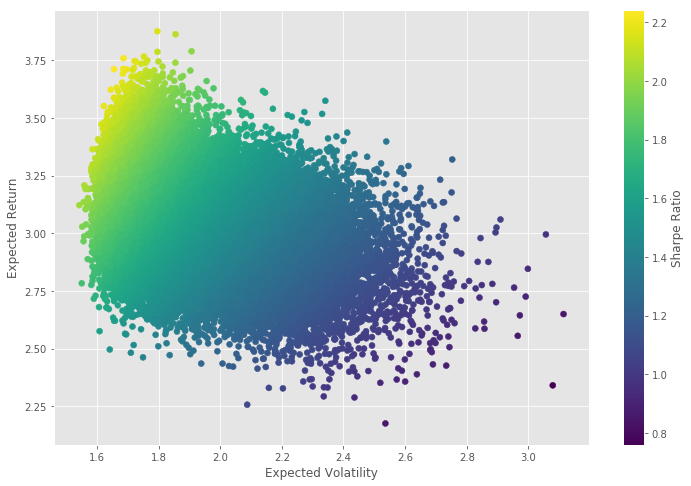

In [288]:
max_port_return = port_return[sharpe_ratio.argmax()]
max_port_vol = port_vol[sharpe_ratio.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(x=port_vol,y=port_return,c=sharpe_ratio)
plt.grid(True)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## Mathematical Optimization for Asset Allocation

In [289]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * len(log_return)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * len(log_return), weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

### Maximum Sharpe Ratio

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [337]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [338]:
def check_sum(weights):
    return np.sum(weights) - 1

In [339]:
cons = ({'type':'eq','fun': check_sum})
noa = len(df_new.columns)
bounds = tuple((0, 1) for x in range(noa))
init_guess = noa * [1. / noa,]
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [340]:
opt_results

     fun: -2.6151796848398057
     jac: array([ 4.71632481e-02,  1.00895762e-03, -3.49551439e-04,  1.23944879e-03,
        5.34547418e-01,  1.12369174e+00,  7.11518824e-01,  4.12017107e-04,
       -1.08790398e-03, -1.40088797e-03,  6.60777092e-04,  1.17456001e+00,
        6.87210441e-01, -2.80678272e-04,  8.45930606e-01,  4.61090833e-01,
        1.19011521e+00,  6.40898943e-04, -3.62932682e-04,  2.23707050e-01])
 message: 'Optimization terminated successfully.'
    nfev: 253
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([7.42153473e-17, 1.38950270e-01, 3.50854968e-01, 5.77310469e-03,
       6.06030674e-16, 1.43446104e-15, 6.34710832e-15, 1.65699247e-01,
       3.86012115e-02, 7.89640326e-02, 1.02482019e-01, 1.22682726e-15,
       5.88035725e-16, 6.98907159e-02, 7.65969838e-16, 3.09028260e-16,
       1.91643938e-15, 2.85430892e-02, 2.02413417e-02, 2.69912317e-16])

In [341]:
opt_ret_vol_sr = pd.DataFrame(get_ret_vol_sr(opt_results.x).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
opt_ret_vol_sr.columns=names
opt_ret_vol_sr

Return  Volatility  Sharpe Ratio
0  4.4727      1.7103        2.6152

If using the above weighting for investment, it will get the below number

- 4.4727 is portfolio expected return
- 1.7103 is portfolio volatility
- 2.6152 is sharpe ratio

In other words, this yields to an expected return of about 447.27%, the expected volatility is about 171.03%, and the resulting optimal Sharpe ratio is 2.6152.

In [342]:
optimal_sharpe = pd.DataFrame(opt_results['x'].round(4)).T
optimal_sharpe.columns=list(df_new.columns)
optimal_sharpe

BTC    XRP     ETH    DOGE  LTC  BTB  BITCNY     XMR   BLOCK    XWC  \
0  0.0  0.139  0.3509  0.0058  0.0  0.0     0.0  0.1657  0.0386  0.079   

      DCR  NXT  FCT    DASH  MAID  BCN  BTS      SC     DGB  MONA  
0  0.1025  0.0  0.0  0.0699   0.0  0.0  0.0  0.0285  0.0202   0.0

These 20 numbers mean the 'best' weighting for the portfolio

### Alternative way to maximize Sharpe Ratio 

Our optimization tool for this analysis is the **optimize** method from the library **SciPy** [8].

Let's define our objective function as a function which takes an array of weights as an input and returns the Expected Return, Expected Volatility and Sharpe Ratio.

In this case, we will seek to maximize the second element of the objective function's result, that is the Sharpe Ratio. We will also pass a few constraints to the optimization which limits the sum of the weights to 1.

In [343]:
def statistics(weights):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(log_return.mean()*weights)*len(log_return)
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*len(log_return),weights)))
    psharp = pret/pvol
    return np.array([pret, pvol, psharp])

In [344]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return statistics(weights)[2] * -1

In [345]:
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(df_new.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

In [346]:
opts = sco.minimize(min_func_sharpe, x0, method='SLSQP',bounds=bnds, constraints=cons)

In [347]:
opts

     fun: -2.6151796848398057
     jac: array([ 4.71632481e-02,  1.00895762e-03, -3.49551439e-04,  1.23944879e-03,
        5.34547418e-01,  1.12369174e+00,  7.11518824e-01,  4.12017107e-04,
       -1.08790398e-03, -1.40088797e-03,  6.60777092e-04,  1.17456001e+00,
        6.87210441e-01, -2.80678272e-04,  8.45930606e-01,  4.61090833e-01,
        1.19011521e+00,  6.40898943e-04, -3.62932682e-04,  2.23707050e-01])
 message: 'Optimization terminated successfully.'
    nfev: 253
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([7.42153473e-17, 1.38950270e-01, 3.50854968e-01, 5.77310469e-03,
       6.06030674e-16, 1.43446104e-15, 6.34710832e-15, 1.65699247e-01,
       3.86012115e-02, 7.89640326e-02, 1.02482019e-01, 1.22682726e-15,
       5.88035725e-16, 6.98907159e-02, 7.65969838e-16, 3.09028260e-16,
       1.91643938e-15, 2.85430892e-02, 2.02413417e-02, 2.69912317e-16])

In [348]:
optimal_weights = opts.x

In [349]:
optimal_sharpe = pd.DataFrame(opts['x']).T
optimal_sharpe.columns=list(df_new.columns)
optimal_sharpe.round(4)

BTC    XRP     ETH    DOGE  LTC  BTB  BITCNY     XMR   BLOCK    XWC  \
0  0.0  0.139  0.3509  0.0058  0.0  0.0     0.0  0.1657  0.0386  0.079   

      DCR  NXT  FCT    DASH  MAID  BCN  BTS      SC     DGB  MONA  
0  0.1025  0.0  0.0  0.0699   0.0  0.0  0.0  0.0285  0.0202   0.0

In [351]:
optimal_ret_vol_sr = pd.DataFrame(statistics(opts['x'])).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr.columns = names
optimal_ret_vol_sr.round(4)

Return  Volatility  Sharpe Ratio
0  4.4727      1.7103        2.6152

## Comparison of portfolio optimizations

|     **Portfolio statistics**   |    Crypto-portfolio   | Mixed-portfolio | Stock-portfolio |
|-------------|:----------:|-----------:|-----------:|
| **Return**    |    4.4727|    1.0964 |    0.5792 |
| **Volatility**    |   1.7103   |    0.3182 |   0.2166 |
| **Sharpe Ratio**     | 2.6152 |    3.4457 |    2.6733 |

### Portfolio creation based on optimized results

In [355]:
## Import already processed portfolio-indices
stock_portfolio = pd.read_csv('stock_portfolio.csv')
mixed_portfolio = pd.read_csv('mixed_portfolio.csv')

In [356]:
stock_portfolio['time'] =  pd.to_datetime(stock_portfolio['Date'], format='%Y-%m-%d')
mixed_portfolio['time'] =  pd.to_datetime(mixed_portfolio['Date'], format='%Y-%m-%d')

In [357]:
stock_portfolio.set_index('time', inplace=True)
mixed_portfolio.set_index('time', inplace=True)

In [358]:
stock_portfolio = stock_portfolio.drop('Date', axis = 1)
mixed_portfolio = mixed_portfolio.drop('Date', axis = 1)

<break>

#### Create Crypto-Index

In [359]:
log_return_norm = log_return[19:]
prices_normalized = log_return_norm.dropna() / log_return_norm.dropna().iloc[0]

In [360]:
# Weigh the crypto-portfolio wit the optimal weights determined above
portfolio_array = np.dot(prices_normalized, optimal_weights)

In [361]:
# Create a Dataframe of the normalized portfolio time series.
crypto_portfolio = pd.DataFrame(data = portfolio_array, index = prices_normalized.index, columns=['Crypto_Portfolio'])

In [362]:
### Create Benchmark
#benchmark = log_return['LTC'][700:]
#benchmark_df = benchmark.dropna() / benchmark.dropna().iloc[0]

In [370]:
plot_df = pd.concat([crypto_portfolio, mixed_portfolio, stock_portfolio], axis=1)

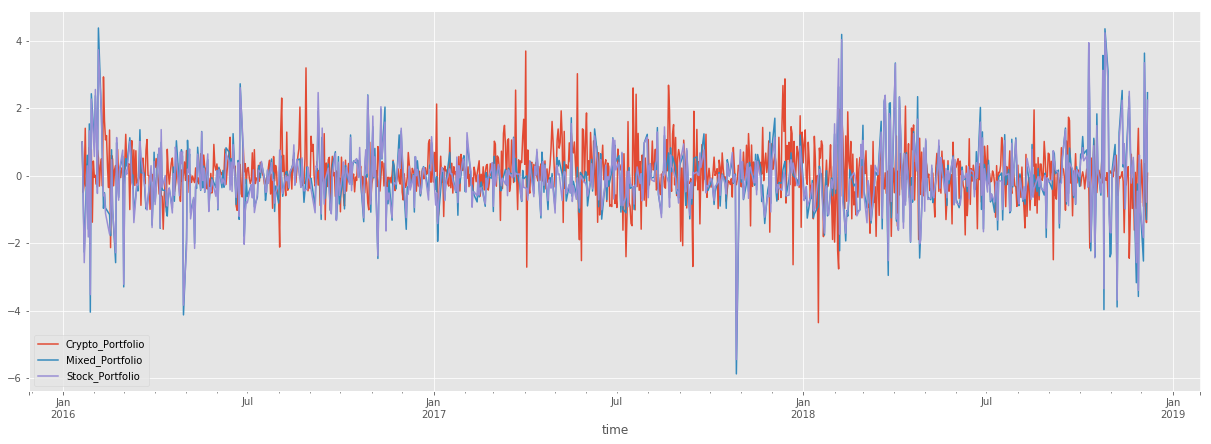

In [371]:
plt.style.use('ggplot')
plot_df.interpolate(method='linear', axis=0).plot(figsize=(21,7))

## References

[1] https://en.wikipedia.org/wiki/Modern_portfolio_theory

[2] Revisions of modern portfolio theory optimization model (Milan Vaclavik, Josef Jablonsky, 2011)

[3] https://medium.com/@omkardash/crypto-portfolio-optimization-python-9d38e9ebe6be

[4] https://www.investopedia.com/terms/m/modernportfoliotheory.asp

[5] https://en.wikipedia.org/wiki/Harry_Markowitz

[6] https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694

[7] Python for Finance - Analyze big financial data (Yves Hilpisch, 2015)

[8] https://github.com/yhilpisch/py4fi/blob/master/jupyter36/11_Statistics_a.ipynb